In [1]:
IMG_DIMEN = 224
N_COLORS = 1


In [2]:
import cv2
import numpy as np

def read_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, dsize=(IMG_DIMEN, IMG_DIMEN))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.astype('float32')/255.0
    return img

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    plt.figure(figsize=(6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
         plt.imshow(img, cmap='gray')
    plt.show()

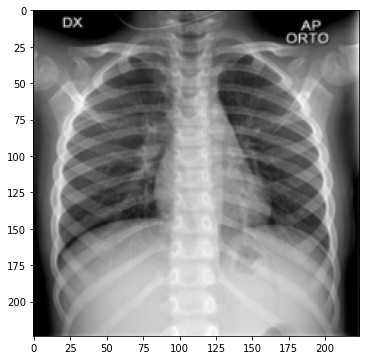

In [4]:
img = read_image('C:/Users/Two Star/Notebooks/Crona_Detection/data/train/COVID/COVID-13.png')
imshow(img)

In [5]:
## build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=(IMG_DIMEN, IMG_DIMEN, N_COLORS)))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
## Load saved model weights
model.load_weights('saved-model/best-model')

In [7]:
## Classify image (function)
def classify_image(img_path):
    img = read_image(img_path)
    return float(model.predict(np.array([img])).squeeze())

In [ ]:
## Flask API
from flask import Flask
from flask import request

app = Flask(__name__)

@app.route('/crona', methods = ['POST'])
def classify_handler():
    img_path = request.form['path']
    y_pred = classify_image(img_path)
    class_name = 'COVID' if y_pred >= 0.5 else 'Normal'
    prob_COVID = y_pred
    prob_Normal = 1 - y_pred
    print('img_path:', img_path)
    print('y_pred:', y_pred)
    print('class_name:', class_name)
    return {
        'prob_Normal': prob_Normal, 
        'prob_COVID': prob_COVID, 
        'class_name': class_name
    }

app.run(port=9030)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
